# Solve Classification Problem using keras🤔

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [57]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [58]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3220,3221,15674331,Bidwill,576,Germany,Male,30,7,132174.41,2,0,0,93767.03,0
2181,2182,15738605,Fischer,634,Germany,Female,46,5,123642.36,1,1,1,49725.16,1
8680,8681,15782939,Storey,747,France,Male,42,4,80214.36,1,1,0,115241.96,1
8922,8923,15624703,Okonkwo,550,Germany,Male,35,9,129847.75,2,1,0,197325.40,0
2142,2143,15782591,Cook,690,France,Male,35,6,112689.95,1,1,0,176962.31,0


- ROwNumber, CustomerId, Surname are not important columns. so, we have to remove them.

In [59]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [60]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [61]:
df.shape

(10000, 11)

In [62]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- Encoding

In [63]:
enc = LabelEncoder()

In [64]:
df['Geography'] = enc.fit_transform(df['Geography'])
df['Gender'] = enc.fit_transform(df['Gender'])

In [65]:
# OneHotEncoding
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [66]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
9798,600,1,30,2,119755.00,1,1,1,21852.91,0,True,False
3850,680,1,34,3,143292.95,1,1,0,66526.01,0,False,False
6077,660,0,37,2,133200.09,1,0,0,71433.88,0,True,False
5490,655,0,78,2,0.00,2,0,1,188435.38,0,False,True
607,584,1,28,10,0.00,2,1,0,19834.32,0,False,False


In [67]:
x = df.drop(columns=['Exited']).values
y = df['Exited'].values

In [68]:
# x
y

array([1, 0, 1, ..., 1, 1, 0])

- Scaling

In [69]:
scaler = StandardScaler()

In [70]:
x = scaler.fit_transform(x) # range(-2,2)

- Train-Test-Split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=51)

## Model

In [72]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [73]:
model = Sequential()

In [74]:
model.add(Dense(11, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 'SIGMOID' used bcoz of Binary-Classification Problem

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [77]:
history = model.fit(x_train, y_train, batch_size=50, verbose=1, epochs=100, validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7904 - loss: 0.5377 - val_accuracy: 0.8037 - val_loss: 0.4668
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8049 - loss: 0.4608 - val_accuracy: 0.8281 - val_loss: 0.4310
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8260 - loss: 0.4180 - val_accuracy: 0.8275 - val_loss: 0.4220
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8241 - loss: 0.4149 - val_accuracy: 0.8288 - val_loss: 0.4181
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8298 - loss: 0.4118 - val_accuracy: 0.8244 - val_loss: 0.4142
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8304 - loss: 0.3999 - val_accuracy: 0.8269 - val_loss: 0.4116
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8425 - loss: 0.3923 - val_accuracy: 0.8281 - val_loss: 0.4094
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8357 - loss: 0.3957 - val_accu

In [78]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [79]:
accuracy_score(y_test, y_pred.round())

0.8535

In [80]:
import matplotlib.pyplot as plt

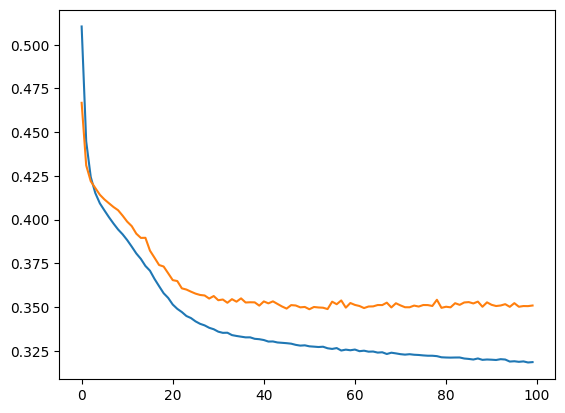

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


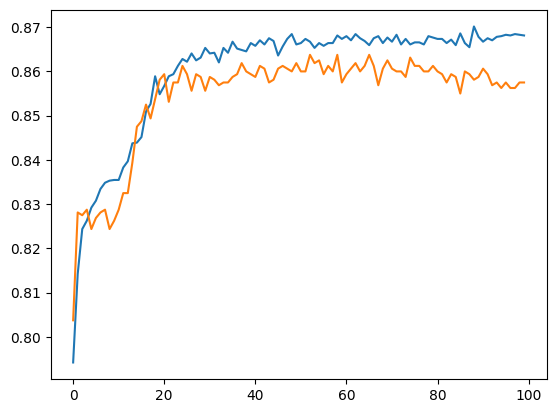

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])